**Data Mining and Machine Learning - Assignment 1**

# Question 1 - NOx Study

Modelling of $LNOx$ concentration as function of other variables 

In [8]:
# Import of used libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [9]:
# Import of the dataset
q1_pd = pd.read_csv('NOxEmissions.csv')
q1_pd

,rownames,julday,LNOx,LNOxEm,sqrtWS
0,193,373,4.457250,5.536489,0.856446
1,194,373,4.151827,5.513000,1.016612
2,195,373,3.834061,4.886994,1.095445
3,196,373,4.172848,5.138912,1.354068
4,197,373,4.322807,5.666518,1.204159
...,...,...,...,...,...
8083,8779,730,5.000585,6.730993,1.396424
8084,8780,730,4.669552,6.165086,1.466288
8085,8781,730,4.380776,5.855493,1.559808
8086,8782,730,4.284276,5.691445,1.449138


## (a) - Data Pre-processing

In the pre-processing we want to address data quality problems like Incorrect Data, Missing Values, duplicate data, outliers... 

- **Missing data:** No missing data found in the dataset
- **Duplicates:** No duplicates were found.

In [10]:
# (a) - Pre-processing

# Check if missing/duplicated/Invalid data is present in the dataset

## Missing data
print(f"Number of missing data: {q1_pd.isnull().sum().sum()}")
## Duplicated data
print(f"Number of duplicated data: {q1_pd.duplicated().sum()}")

## Statistical Summary
print(f"===Statistical Summary===\n{q1_pd.describe()}")


Number of missing data: 0
Number of duplicated data: 0
===Statistical Summary===
          rownames       julday         LNOx       LNOxEm       sqrtWS
count  8088.000000  8088.000000  8088.000000  8088.000000  8088.000000
mean   4597.584570   556.078882     4.378691     7.338244     1.365253
std    2464.686179   102.706509     0.937389     1.016658     0.466280
min     193.000000   373.000000    -0.105361     4.157866     0.316228
25%    2507.750000   469.000000     3.891820     6.514982     1.016612
50%    4681.500000   560.000000     4.497028     7.692495     1.284523
75%    6709.250000   644.000000     5.012134     8.239159     1.648181
max    8783.000000   730.000000     6.576121     8.600040     3.624017


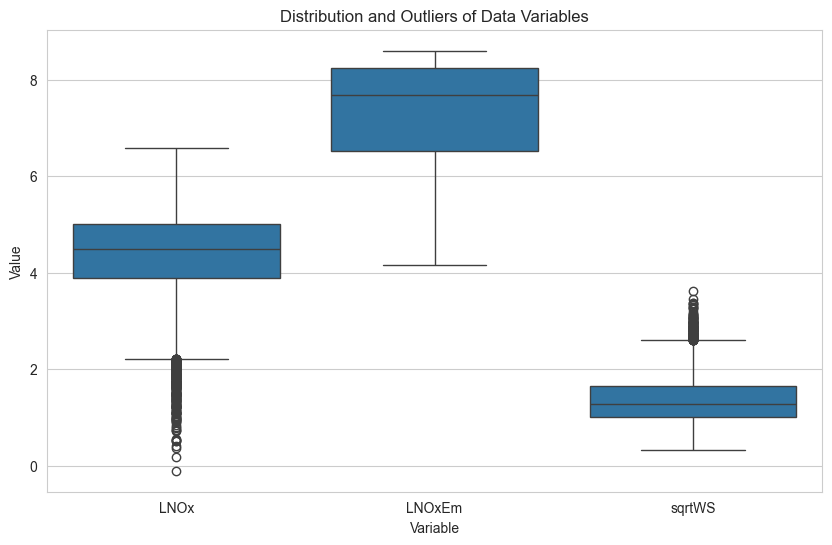

In [11]:
# Check for outliers

melted_data = pd.melt(q1_pd, value_vars=['LNOx', 'LNOxEm', 'sqrtWS'], var_name='Variable', value_name='Value')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6)) 
boxplot = sns.boxplot(x='Variable', y='Value', data=melted_data)
boxplot.set_title('Distribution and Outliers of Data Variables')
boxplot.set_ylabel('Value')
boxplot.set_xlabel('Variable')

plt.show()

## (b) - Distribution of LNOx variable

To describe the distribution of the $LNOx$ variable we are going to use descriptive statistics indicators along with diagrams for visualization.

$LNOx$ appears to have a normal distribution with a significant number of outliers on the left side (as shown by the previous box-plot.
Also a left (negative) skew is evident in the graph and by using the descriptive statistics. 

Mean: 4.378690810185019
Median: 4.49702802736839
Standard Deviation: 0.937388582502527
Variance: 0.8786973546060968
Range: 6.681481834658996
Skewness: -0.8244320335510329
Kurtosis: 1.1307787937580986


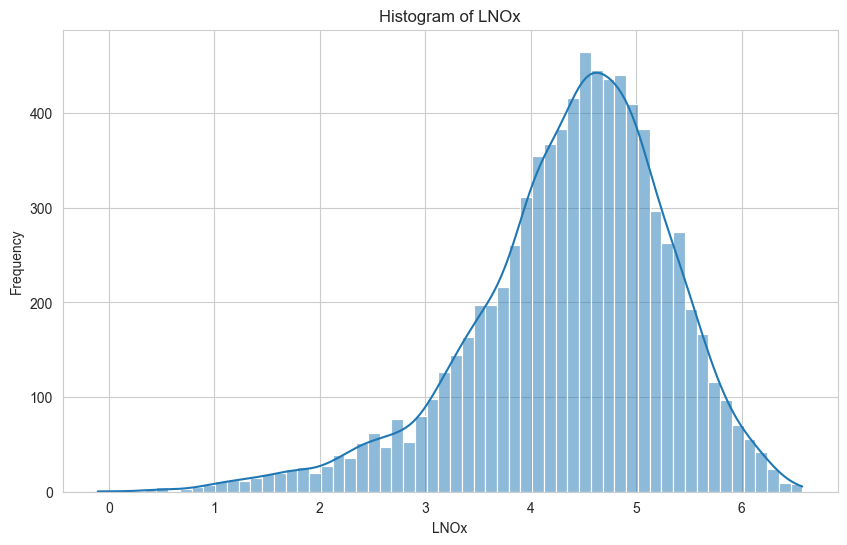

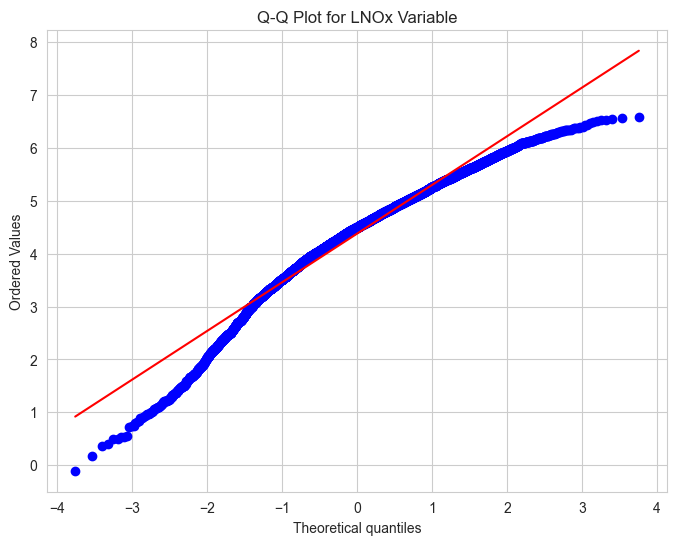

In [12]:
# (b) - LNOx distribution

lnox = q1_pd['LNOx']

## Descriptive Stats
range_lnox = lnox.max() - lnox.min()
print(f"Mean: {lnox.mean()}\nMedian: {lnox.median()}\nStandard Deviation: {lnox.std()}\nVariance: {lnox.var()}\nRange: {range_lnox}\nSkewness: {lnox.skew()}\nKurtosis: {lnox.kurt()}")

## Histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(q1_pd['LNOx'], kde=True)
plt.title('Histogram of LNOx')
plt.xlabel('LNOx')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
stats.probplot(q1_pd['LNOx'], dist="norm", plot=ax)
ax.set_title("Q-Q Plot for LNOx Variable")
plt.show()

## (c) - Linear Model of LNOx as fn. of LNOxEm, sqrtWS

The $LNOx$ linear model is fitted below using a multiple linear regression, $LNOx$ is the dependent variable, $LNOxEm$ and $sqrtWS$ are the independent variables as requested by the question.

The OLS-regression results from the model shows that:

- $R^2 = 0.663$, that means that the independent variables can explain about $66\%$ of variability of $LNOx$.
- The coefficients of the independent variables explains:
    - $LNOxEm$: When this variables increase, $LNOx$ **increases** too by a factor of $\approx 0.06$.
    - $sqrtWS$: When the square root of wind speed increases, $LNOx$ get **decreased** by a factor of $\approx 1.01$


In [13]:
# (c) - LNOx linear model 

X = q1_pd[['LNOxEm', 'sqrtWS']]
X = sm.add_constant(X)
y = q1_pd['LNOx']
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LNOx   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     7952.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:54:09   Log-Likelihood:                -6554.7
No. Observations:                8088   AIC:                         1.312e+04
Df Residuals:                    8085   BIC:                         1.314e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0619      0.046     23.097      0.000       0.972       1.152
LNOxEm         0.6414      0.006    107.092      0.000       0.630       0.653
sqrtWS        -1.0182      0.013    -77.969      0.000      -1.044      -0.993
==============================================================================
Omnibus:                       28.937   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.943
Skew:                          -0.115   Prob(JB):                     1.91e-07
Kurtosis:                       3.198   Cond. No.                         58.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (d) - Relationship between dependent and independent variables

In the Linear Regression model created above, we analyzed how the concentration of nitrogen close to a motorway ($LNOx$, the dependent variable) is influenced by:

- The emission of $NOx$ of cars on the motorway ($LNOxEm$)
- The square root of wind speed ($sqrtWS$)

The results of the model shows that both (independent) variables are significant in determining the concentration of $NOx$. An increase of the wind speed ($sqrtWS$) tends to lower the concentration of $NOx$, probably because it would disperse the $NOx$ present in the air. 
On the other hand $LNOxEm$ has a positive impact on the concentration of $NOx$, this probably means that when the volume of emissions of car in the motorway increases so does the $NOx$ concentration close the motorway. However, this affects the concentration of nitrogen less than the wind does.

## (e) - Prediction of LNOx given the indp. variables values.

Given the value of the emission of cars in the motorway ($LNOxEm = 7.5$) and wind speed ($sqrtWS = 1.3$) the estimated value for the concentration of pollution close to the motorway is $LNOx \approx 4.55$. This means that given the amount of pollution the cars are making ($7.5$) and how fast the wind is blowing ($1.3$) the air pollution is expected to be around $4.55$.

By consulting the data available the prediction in close to the average concentration of pollution, suggesting that the prediction is within reasonable ranges.

The predicted LNOx value is: 4.55


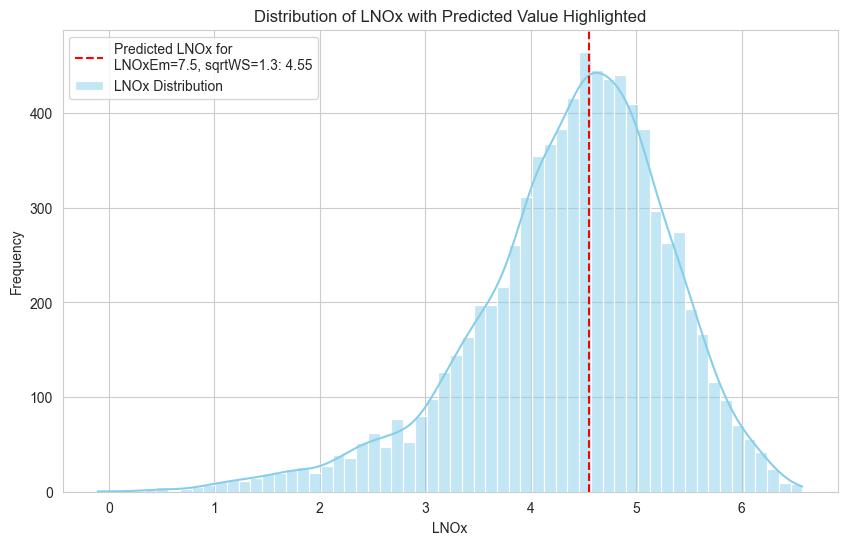

In [20]:
# (e) - prediction using pre-defined values

# LNOxEm = 7.5, sqrtWS = 1.3
new_data = pd.DataFrame({'const': 1, 'LNOxEm': [7.5], 'sqrtWS': [1.3]})
predicted_LNOx = model.predict(new_data)

print(f"The predicted LNOx value is: {predicted_LNOx[0]:.2f}")

# Distribution + predicted value
plt.figure(figsize=(10, 6))
sns.histplot(q1_pd['LNOx'], kde=True, color="skyblue", label='LNOx Distribution')
plt.axvline(x=predicted_LNOx[0], color='red', linestyle='--', label=f'Predicted LNOx for\nLNOxEm=7.5, sqrtWS=1.3: {predicted_LNOx.iloc[0]:.2f}')
plt.legend()
plt.title('Distribution of LNOx with Predicted Value Highlighted')
plt.xlabel('LNOx')
plt.ylabel('Frequency')
plt.show()

# Question 2 - Airbag study

Modelling probability of surviving a crash given 7 variables, using a *Generalized Linear Model*.

## (a) - Data Pre-Processing

... 